In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../heart.csv')

In [4]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


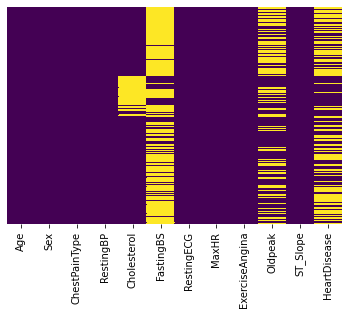

In [5]:
# data which are zeros
sns.heatmap(df.eq(0),yticklabels=False,cbar=False,cmap='viridis')

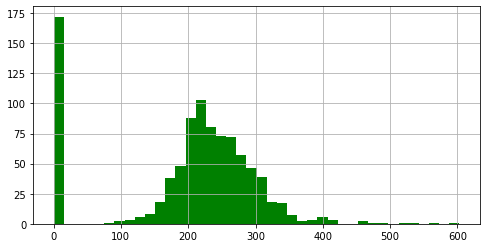

In [6]:
# There is a lot of 0 value in Cholesterol columns
df['Cholesterol'].hist(color='green',bins=40,figsize=(8,4))

In [7]:
# We need to fill in the Cholesterol data points where the value is at 0. We will do this by filling in the median (imputation)
df['Cholesterol'].median()

223.0

In [8]:
#filling in the zero value in cho median 
df['Cholesterol'] = df['Cholesterol'].replace(0,df['Cholesterol'].median())

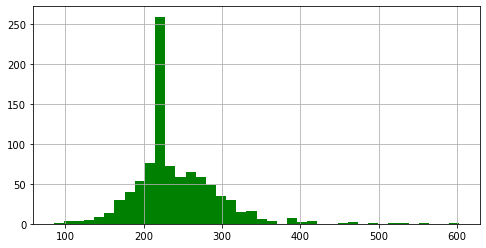

In [9]:
# Now there is no O values in Cholesterol
df['Cholesterol'].hist(color='green',bins=40,figsize=(8,4))

In [10]:
# There is one value in resting blood pressure where the value is 0. That doesn't really make sense so we will drop it
df[df['RestingBP'] == 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,M,NAP,0,223,0,Normal,155,N,1.5,Flat,1


In [11]:
# drop row where resting blood pressure == 0
df = df[df['RestingBP'] != 0]

C:\Users\tango\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


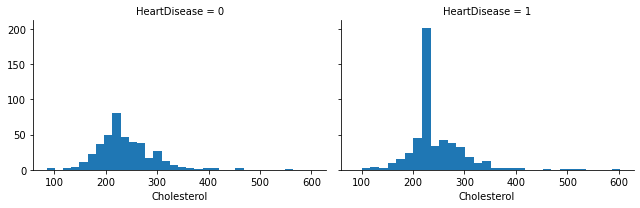

In [12]:
g = sns.FacetGrid(data=df,col='HeartDisease', size=3, aspect=1.5)
g.map(plt.hist,'Cholesterol', bins=30)

In [13]:
df.to_csv('../heart_clean.csv', index = False)